# Read the GloVe file for word embeddings

- GloVe (Global Vectors for Word Representation) is one method of embedding, converting tokens into vectors that NLP systems can process.
- It takes a large training corpus and models the co-occurrence of different words; this shapes the cosine similarity between different pairs of embeddings in the vocabulary.
- Detailed explanations: https://nlp.stanford.edu/projects/glove/, https://www.kaggle.com/discussions/general/297606 

In [1]:
# reference: https://keras.io/examples/nlp/pretrained_word_embeddings/
import numpy as np
import pandas as pd
path_to_glove_file = "/kaggle/input/glove-embeddings/glove.6B.100d.txt"
error_msg = '''# need to download https://www.kaggle.com/datasets/anmolkumar/glove-embeddings first
# alternatively, go to https://www.kaggle.com/code/carsoncheng/glove-word-embeddings'''
embeddings_index = {}
try:
    global embeddings_index
    with open(path_to_glove_file) as f:
        for line in f:
            word, coefs = line.split(maxsplit=1)
            coefs = np.fromstring(coefs, "f", sep=" ")
            embeddings_index[word] = coefs
except:
    print(error_msg)

print("Found %s word vectors." % len(embeddings_index))

# need to download https://www.kaggle.com/datasets/anmolkumar/glove-embeddings first
# alternatively, go to https://www.kaggle.com/code/carsoncheng/glove-word-embeddings
Found 0 word vectors.


# Write Your Observations Here

- What is the vocabulary size of this GloVe tokenizer? ______

In [2]:
query = "science" # feel free to change this query here!
topk = 10
keys = list(embeddings_index.keys())
if query.lower() in keys:
    idx = keys.index(query.lower())
else:
    print("Word not found in query!")
values = list(embeddings_index.values())
q = np.array(values[idx])
v = np.array(values)
# compute cosine similarities
q = (q / np.linalg.norm(q)).reshape(1, 100) # normalize the query and targets 
v = v / np.linalg.norm(v, axis=1, keepdims=True) # so that each row has a norm of 1
sims = q @ v.T # then matrix multiply to obtain cosine similarities
top_matches = np.argsort(sims)[0][len(sims[0])-topk+1:len(sims[0])-1][::-1] # argsort to isolate top indexes
# indexing (from len(sims[0])-topk+1 to len(sims[0])-1, excluding len(sims[0])-1) to prevent the query
# itself from being retrieved (as the query and itself always has a maximum similarity score of 1.0)
terms, scores = [], []
for i in top_matches:
    terms.append(keys[i])
    scores.append(sims[0][i])
result = pd.DataFrame({'top_matches': terms, 'similarity': scores})
result

,top_matches,similarity
0,sciences,0.807316
1,physics,0.791470
2,institute,0.766325
3,mathematics,0.760767
4,studies,0.759045
5,research,0.758529
6,biology,0.738252
7,university,0.731453


<Axes: >

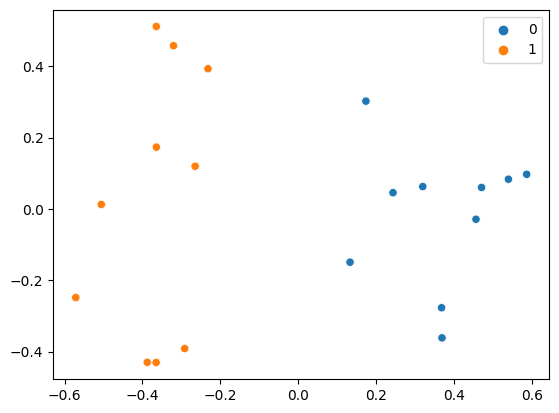

In [3]:
import random
from sklearn.decomposition import PCA
import seaborn as sns
# the queries are generated using deepseek with the prompt:
'''
suggest 10 common words related to language and 10 common words related to science, 
wrapped into a python list concatenated together
'''
# these prompts can help generate cases for visualizations!
queries = [
    # Language-related words
    "grammar", "vocabulary", "syntax", "pronunciation", "translation",
    "dialect", "metaphor", "phonetics", "semantics", "rhetoric",
    
    # Science-related words
    "experiment", "hypothesis", "theory", "observation", "laboratory",
    "molecule", "organism", "physics", "chemistry", "biology"
]
colors = [random.randint(0, 1) for i in range(20)] # random split
colors = np.array([0] * 10 + [1] * 10) # split according to theme
indexes = []
for item in queries:
    indexes.append(keys.index(item.lower()))
pca = PCA(n_components=2)
reduced = pca.fit_transform(v[indexes])
sns.scatterplot(x=reduced[:,0], y=reduced[:,1], hue=colors)

# Write Your Observations Here

- We separated the embeddings into two classes.
- When using a random split to separate the embeddings, the dimensionality-reduced data (is / is not) linearly separable.
- When using the theme-focused split (first 10 being the language category, last 10 being the science category), the dimensionality-reduced data (is / is not) linearly separable
- The word embeddings (captures / does not capture) information related to the general theme of the words!